In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
X=load_iris()
pdiris=pd.DataFrame(X['data'], columns=['sl','sw','pl','pw'])
pdy=pd.DataFrame(X['target'],columns=['target']).apply(lambda x: X['target_names'][x])
x_train, x_test, y_train, y_test=train_test_split(pdiris, pdy, test_size=.3, random_state=123)

clf=tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=6, min_samples_leaf=3, min_weight_fraction_leaf=0.05, max_features=None, random_state=None, max_leaf_nodes=3, min_impurity_decrease=0.05, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
model=clf.fit(x_train,y_train)

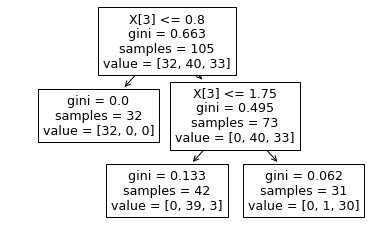

In [14]:
#tree.plot_tree(clf)
#plt.figure(figsize=(0,10))
tree.plot_tree(model)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

In [15]:

#r = export_text(decision_tree, feature_names=iris['feature_names'])
r=export_text(model, feature_names=['sl','sw','pl','pw'])

In [16]:
print(r)

|--- pw <= 0.80
|   |--- class: setosa
|--- pw >  0.80
|   |--- pw <= 1.75
|   |   |--- class: versicolor
|   |--- pw >  1.75
|   |   |--- class: virginica



In [17]:
y_pred=model.predict(x_test)

In [18]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9555555555555556


In [19]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

